In [1]:
import os
import yaml

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

import zarr
import dask.array as da

from utils.utility_functions import (
    LBP, ORB, FFT, STD, MSE, SSIM, kl_divergence, u_stats, hsd, compare_clusters, plot,
    transposeZarr
)

In [2]:
# Specify VAE clustering of interest and associated window size and latent dimension
clustering = 'VAE20'
window_size = 30  # in pixels
latent_dim = 850

# Specify cluster pairs
pairs = [(12, 15)]


(12, 15)


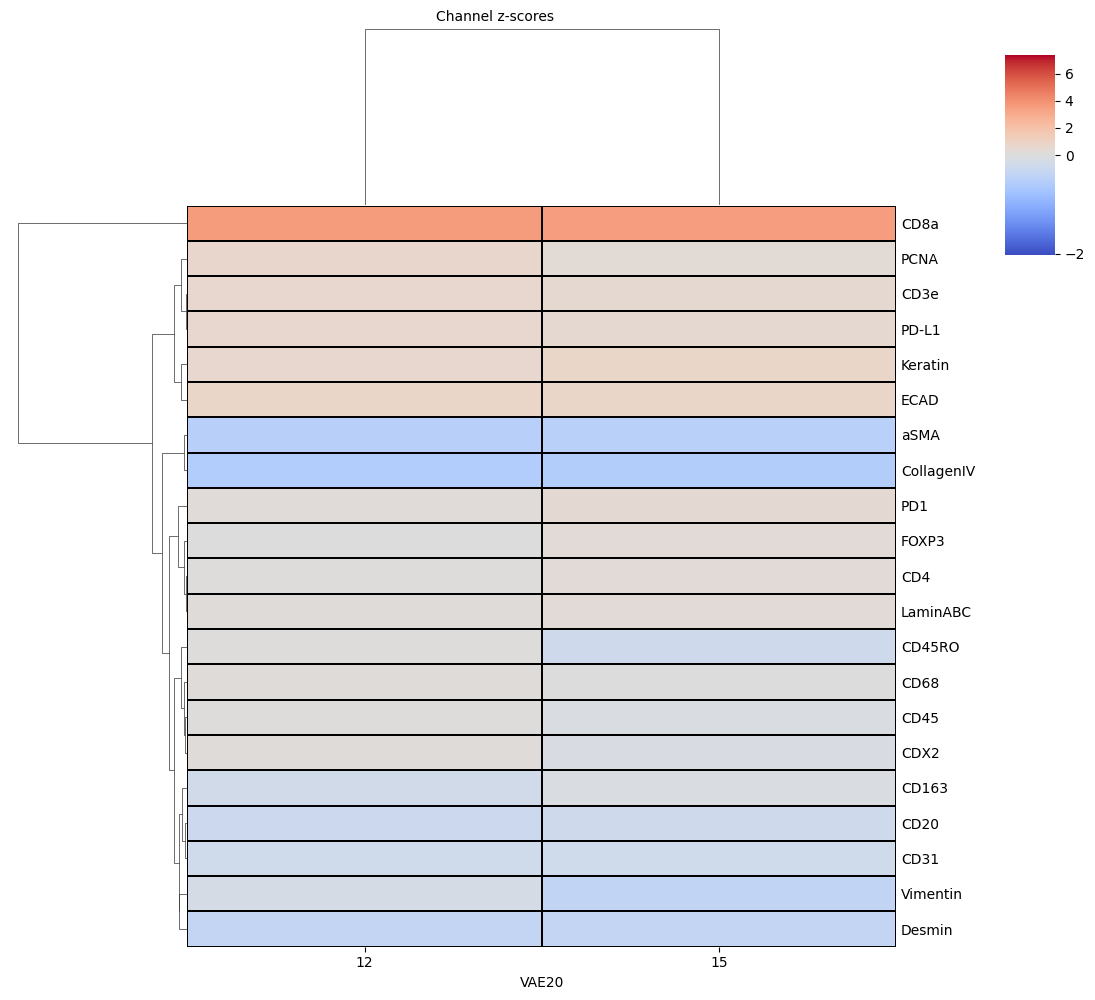


Computing MSE for Cluster: 12, Channel: CD3e


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124750/124750 [00:29<00:00, 4266.31it/s]
/Users/greg/projects/vae-paper/src/utils/utility_functions.py:273: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  channel_df = pd.concat([channel_df, cluster_df], axis=0)


Computing MSE for Cluster: 15, Channel: CD3e


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124750/124750 [00:28<00:00, 4390.68it/s]
/Users/greg/projects/vae-paper/src/utils/utility_functions.py:315: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, channel_df], axis=0)



Computing MSE for Cluster: 12, Channel: CD45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124750/124750 [00:26<00:00, 4668.66it/s]
/Users/greg/projects/vae-paper/src/utils/utility_functions.py:273: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  channel_df = pd.concat([channel_df, cluster_df], axis=0)


Computing MSE for Cluster: 15, Channel: CD45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124750/124750 [00:28<00:00, 4366.13it/s]



Computing MSE for Cluster: 12, Channel: CD8a


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124750/124750 [00:28<00:00, 4389.70it/s]
/Users/greg/projects/vae-paper/src/utils/utility_functions.py:273: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  channel_df = pd.concat([channel_df, cluster_df], axis=0)


Computing MSE for Cluster: 15, Channel: CD8a


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124750/124750 [00:27<00:00, 4503.86it/s]



Computing MSE for Cluster: 12, Channel: PCNA


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124750/124750 [00:31<00:00, 4023.27it/s]
/Users/greg/projects/vae-paper/src/utils/utility_functions.py:273: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  channel_df = pd.concat([channel_df, cluster_df], axis=0)


Computing MSE for Cluster: 15, Channel: PCNA


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124750/124750 [00:30<00:00, 4102.35it/s]



Computing MSE across clusters 12v15 for channel: CD3e


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:06<00:00,  7.55it/s]


Computing MSE across clusters 12v15 for channel: CD45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:13<00:00,  6.83it/s]


Computing MSE across clusters 12v15 for channel: CD8a


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:22<00:00,  6.07it/s]


Computing MSE across clusters 12v15 for channel: PCNA


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:13<00:00,  6.77it/s]



MSE U-stats:
            u-stat  pval  plot_ch
CD3e  2.771975e+09   0.0        0
CD45  6.390740e+09   0.0        1
CD8a  7.201772e+09   0.0        2
PCNA  1.222691e+10   0.0        3



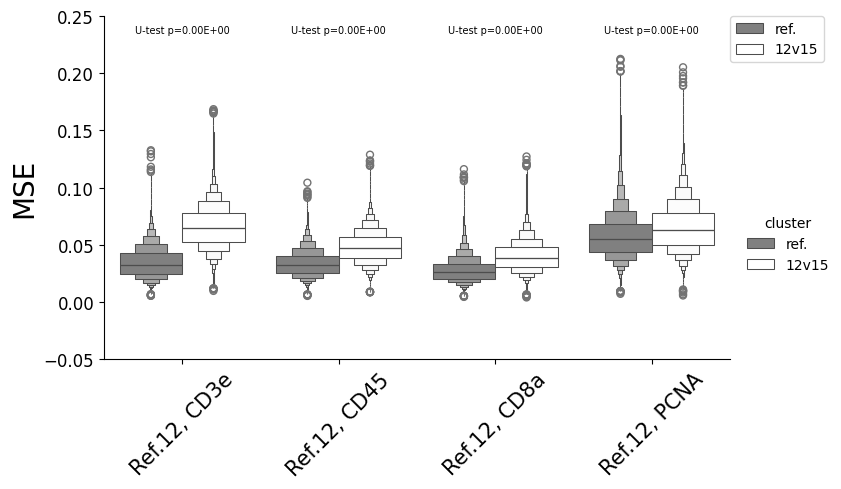

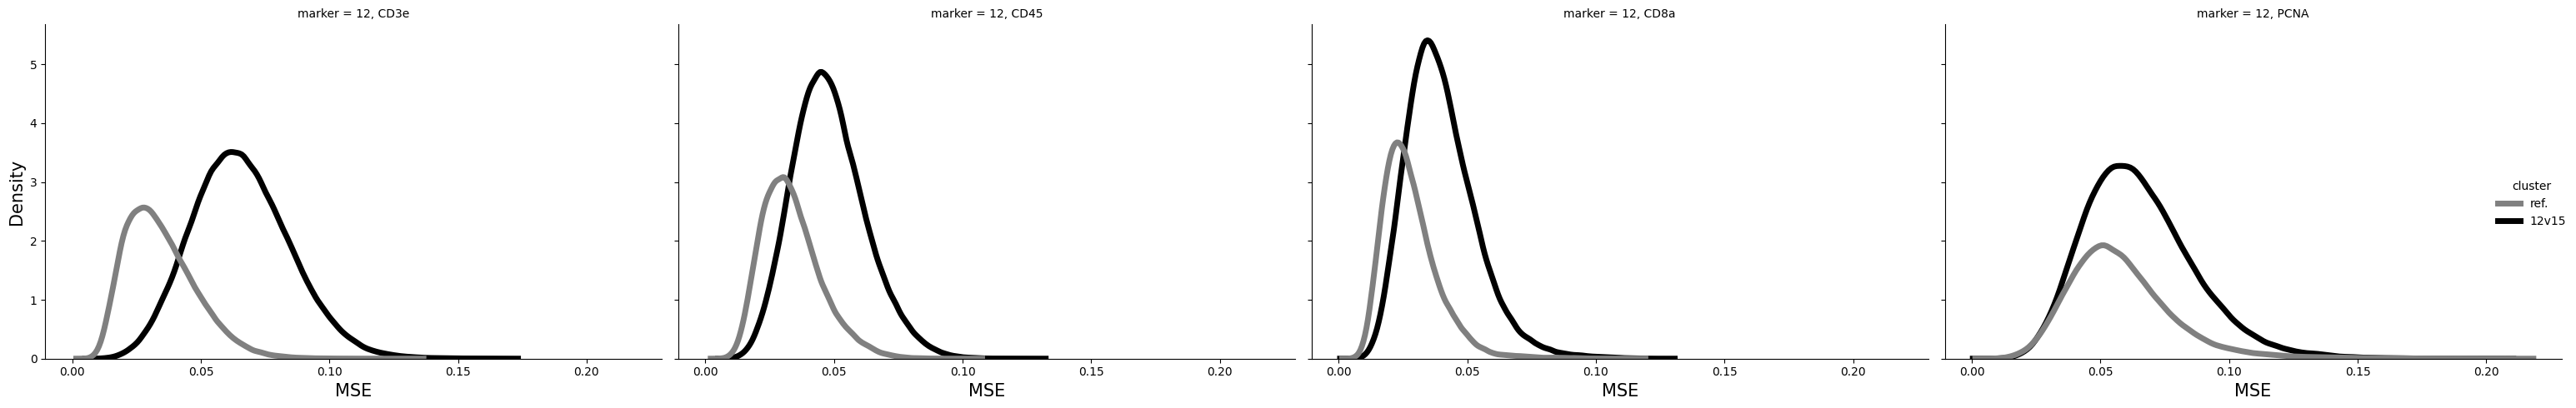

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


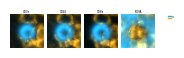

In [3]:
# Paths and input
out = os.path.join(os.getcwd(), f'output/img_similarity_2')
if not os.path.exists(out):
    os.makedirs(out)

# Read single-cell sample for VAE analysis
main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))
vae_clusters = main

# Read image contrast settings for CRC-097 (defined earlier in CyLinter)
if os.path.exists(os.path.join(os.getcwd(), 'input/CRC-097_cylinter_contrast_limits.yml')):
    contrast_limits = yaml.safe_load(
        open(os.path.join(os.getcwd(), 'input/CRC-097_cylinter_contrast_limits.yml'))
    )

# Channel mappings in OME-TIFF
markers = {
    0: 'CD3e', 1: 'CD45RO', 2: 'Keratin', 3: 'aSMA', 4: 'CD4', 5: 'CD45',
    6: 'PD1', 7: 'CD20', 8: 'CD68', 9: 'CD8a', 10: 'CD163', 11: 'FOXP3',
    12: 'PD-L1', 13: 'ECAD', 14: 'Vimentin', 15: 'CDX2', 16: 'LaminABC',
    17: 'Desmin', 18: 'CD31', 19: 'PCNA', 20: 'CollagenIV'
}

# Read combined training, validation, and test thumbnails
root = os.path.join(os.getcwd(), f'input/{clustering}/6_latent_space_LD{latent_dim}')
combo_dir = os.path.join(root, 'combined_zarr')
X_combo = zarr.open(combo_dir)

# Rearrange Zarr dimensions to fit shape of expected VAE input
# (i.e. cells, x, y, channels)
X_combo = transposeZarr(z=X_combo)
X_combo = X_combo.compute()

# Compute median values of per image, per channel pixel intensity means
means = da.mean(X_combo, axis=(1, 2)).compute()

medians = pd.DataFrame(columns=[i for i in markers.values()], data=means)
medians[clustering] = main[clustering]
medians = medians.groupby(clustering).median()

# Compute per channel z-scores across clusters
medians = (medians-medians.mean())/medians.std()

# Zero-center colorbar
norm = TwoSlopeNorm(vcenter=0, vmin=medians.min().min(), vmax=medians.max().max())

print()
for clus_pair in pairs:

    print(clus_pair)

    combo_name = f'{clus_pair[0]}v{clus_pair[1]}'

    save_dir = os.path.join(out, combo_name)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Only show VAE clusters in fist cluster pair in heatmap
    clustermap_input = medians[medians.index.isin(pairs[0])]

    g = sns.clustermap(
            clustermap_input.T, cmap='coolwarm', standard_scale=None, yticklabels=1, xticklabels=1,
            linewidths=0.1, linecolor='k', cbar=True, norm=norm 
        )
    g.ax_heatmap.set_xticklabels(
        [i.get_text() for i in g.ax_heatmap.get_xticklabels()], rotation=0
    )
    g.ax_heatmap.set_yticklabels(
        [i.get_text() for i in g.ax_heatmap.get_yticklabels()], rotation=0
    )
    g.ax_cbar.set_position([1.01, 0.75, 0.05, 0.2])
    g.fig.suptitle('Channel z-scores', y=0.995, fontsize=10)
    g.ax_heatmap.yaxis.set_tick_params(length=0.05, width=0.01)
    plt.savefig(os.path.join(save_dir, 'channel_z-scores.pdf'), bbox_inches='tight')
    plt.show()
    
    # Get positional indices of clustering cells (aligned with X_combo)
    clus1 = vae_clusters.index[vae_clusters[clustering] == clus_pair[0]]
    clus2 = vae_clusters.index[vae_clusters[clustering] == clus_pair[1]]

    # Take subsets
    clus1 = clus1[0:500]
    clus2 = clus2[0:500]
    
    expressed_channels = {0: ('CD3e', 0), 5: ('CD45', 1), 9: ('CD8a', 2), 19: ('PCNA', 3)}

    for metric in ['MSE']:
    
        df, cluster_select, sq_err = compare_clusters(
            clus1_name=clus_pair[0], clus1=clus1,
            clus2_name=clus_pair[1], clus2=clus2,
            metric=metric, expressed_channels=expressed_channels,
            markers=markers, X_combo=X_combo, combo_name=combo_name,
            save_dir=save_dir, window_size=window_size
        )
    
        # Save dataframe with metric values
        df.reset_index(drop=True, inplace=True)
        df.to_csv(os.path.join(save_dir, f'{metric}.csv'), index=False)
    
        # Create dataframe of stored t-test stats
        stats = u_stats(
            df=df, metric=metric, cluster_select=cluster_select,
            expressed_channels=expressed_channels, markers=markers,
            combo_name=combo_name
        )
    
        # Plot metric data
        plot(
            df=df, metric=metric, stats=stats, sq_err=sq_err,
            combo_name=combo_name, clus_pair=clus_pair, save_dir=save_dir
        )